Kelompok 2
1. Clarissa Aydin Rahmazea - 5027241014
2. Kaisar Hanif Pratama - 5027241029
3. Jonathan Zelig Sutopo - 5027241047
4. Muhammad Khairul Yahya - 5027241092

In [434]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns

df = pd.read_excel('Dataset.xlsx')

In [435]:
df

,Tanggal,Curah Hujan (mm),Penjualan A (pcs),Penjualan B (pcs)
0,1,1.4,0,507
1,2,1.2,27,61
2,3,15.2,458,367
3,4,13.4,20,21
4,5,7.7,7,0
...,...,...,...,...
116,4,2.2,430,421
117,5,0.5,208,24
118,6,33.4,200,189
119,7,0.0,0,324


In [436]:
# data a
maxColA = max(df['Penjualan A (pcs)'])
minColA = min(df['Penjualan A (pcs)'])
lenColA = len(df['Penjualan A (pcs)'])

jangkauanA = maxColA-minColA
kelasIntervalA = math.ceil(1+(3.3*math.log(lenColA)))
pjgKelasIntervalA = math.ceil(jangkauanA / kelasIntervalA)

rowsA = [ [None] for _ in range (kelasIntervalA)]
colsA1 = [
    'Batas Bawah Kelas', 
    'Batas Atas Kelas', 
    'Frekuensi (F)', 
    'Frekuensi Kumulatif', 
    'Nilai Tengah (NT)', 
    'F.NT', 
    # '|NT-Mean|', 
    # 'F|NT-Mean|', 
    # '(NT-Mean)^2', 
    # 'F(NT-Mean)^2'
]

In [437]:
# functions
def limitSetter (startValue, increment, arr) :
    temp = startValue
    for x in range (len(arr)):
        if arr[x][0] is None :
            arr [x][0] = temp
        else : 
            arr[x].append(temp)
        temp += increment

def rowSetter1(colName, arr) :
    for x in range(len(arr)): 
        interval = [arr[x][0], arr[x][1]]
        categories = pd.cut(df[colName], interval, include_lowest = True)
        frequency = categories.value_counts().values
        arr[x].append(frequency[0])
        if x == 0 :
            arr[x].append(arr[x][2])
        else :
            cumulative = arr[x-1][3] + arr[x][2] 
            arr[x].append(cumulative)
            
        NT = (arr[x][0] + arr[x][1]) / 2
        arr[x].append(NT)
        F_NT = arr[x][2] * arr[x][4]
        arr[x].append(F_NT)

In [438]:
# calling upon fucntions for data set A
limitSetter(startValue = minColA, increment = pjgKelasIntervalA, arr = rowsA)
limitSetter(startValue = (pjgKelasIntervalA - 1), increment = pjgKelasIntervalA, arr = rowsA)
rowSetter1 (colName = 'Penjualan A (pcs)', arr = rowsA)

In [439]:
# declaring data set A and calling it
dfA1 = pd.DataFrame(data = rowsA, columns = colsA1)
dfA1

,Batas Bawah Kelas,Batas Atas Kelas,Frekuensi (F),Frekuensi Kumulatif,Nilai Tengah (NT),F.NT
0,0,26,51,51,13.0,663.0
1,27,53,10,61,40.0,400.0
2,54,80,3,64,67.0,201.0
3,81,107,0,64,94.0,0.0
4,108,134,4,68,121.0,484.0
5,135,161,4,72,148.0,592.0
6,162,188,4,76,175.0,700.0
7,189,215,13,89,202.0,2626.0
8,216,242,4,93,229.0,916.0
9,243,269,4,97,256.0,1024.0


In [440]:
# second process of making the table for data set A
freqSum = dfA1['Frekuensi (F)'].sum()
F_NT_Sum = dfA1['F.NT'].sum()
mean = F_NT_Sum / freqSum 

colsA2 = [
    'Batas Bawah Kelas', 
    'Batas Atas Kelas', 
    'Frekuensi (F)', 
    'Frekuensi Kumulatif', 
    'Nilai Tengah (NT)', 
    'F.NT', 
    '|NT-Mean|', 
    'F|NT-Mean|', 
    '(NT-Mean)^2', 
    'F(NT-Mean)^2'
]

def rowSetter2(mean, arr) :
    for x in range (len(arr)) : 
        NT_Mean = abs(arr[x][4]-mean)
        arr[x].append(NT_Mean)
        F_NT_Mean = (arr[x][2])*(arr[x][6])
        arr[x].append(F_NT_Mean)
        NT_Mean_Power = pow((arr[x][6]),2)
        arr[x].append(NT_Mean_Power)
        F_NT_Mean_Power = (arr[x][2])*(arr[x][8])
        arr[x].append(F_NT_Mean_Power)

In [441]:
# calling function for the final time to declare the data set A's fixed table
rowSetter2(mean = mean, arr = rowsA)

In [442]:
# declaring data set A fixed and calling it
dfA2 = pd.DataFrame(data = rowsA, columns = colsA2)
dfA2

,Batas Bawah Kelas,Batas Atas Kelas,Frekuensi (F),Frekuensi Kumulatif,Nilai Tengah (NT),F.NT,|NT-Mean|,F|NT-Mean|,(NT-Mean)^2,F(NT-Mean)^2
0,0,26,51,51,13.0,663.0,121.38843,6190.809917,14735.150878,751492.694761
1,27,53,10,61,40.0,400.0,94.38843,943.884298,8909.175671,89091.756711
2,54,80,3,64,67.0,201.0,67.38843,202.165289,4541.200464,13623.601393
3,81,107,0,64,94.0,0.0,40.38843,0.000000,1631.225258,0.000000
4,108,134,4,68,121.0,484.0,13.38843,53.553719,179.250051,717.000205
5,135,161,4,72,148.0,592.0,13.61157,54.446281,185.274845,741.099378
6,162,188,4,76,175.0,700.0,40.61157,162.446281,1649.299638,6597.198552
7,189,215,13,89,202.0,2626.0,67.61157,878.950413,4571.324431,59427.217608
8,216,242,4,93,229.0,916.0,94.61157,378.446281,8951.349225,35805.396899
9,243,269,4,97,256.0,1024.0,121.61157,486.446281,14789.374018,59157.496073


In [443]:
freqSum_A = dfA2['Frekuensi (F)'].sum()
F_NT_Sum_A = dfA2['F.NT'].sum()
meanA = F_NT_Sum / freqSum 
print ('Mean nya adalah ', meanA)

medianA = dfA2.at[1, 'Batas Bawah Kelas']+((((dfA2.at[16, 'Frekuensi Kumulatif']/2) - (dfA2.at[0, 'Frekuensi Kumulatif']))/ (dfA2.at[1, 'Frekuensi (F)'])) * pjgKelasIntervalA)
print ('Median nya adalah ', medianA)

modeA = dfA2.at[0, 'Batas Bawah Kelas']+ (pjgKelasIntervalA*((dfA2.at[0, 'Frekuensi (F)'] - 0) / ((dfA2.at[0, 'Frekuensi (F)'] - 0) + ((dfA2.at[0, 'Frekuensi (F)'] - dfA2.at[1, 'Frekuensi (F)'])))))
print ('Modus nya adalah ', modeA)

rangeA = dfA2.at[16, 'Nilai Tengah (NT)'] - dfA2.at[0, 'Nilai Tengah (NT)']
print ('Range nya adalah ', rangeA) 

Q1A = ((dfA2.at[0, 'Batas Bawah Kelas'])-0.5) + ((((dfA2.at[16, 'Frekuensi Kumulatif']/4) - 0)/dfA2.at[0, 'Frekuensi (F)'])*pjgKelasIntervalA)
Q3A = ((dfA2.at[8, 'Batas Bawah Kelas'])-0.5) + ((((((dfA2.at[16, 'Frekuensi Kumulatif'])*3)/4) - (dfA2.at[7, 'Frekuensi Kumulatif']))/dfA2.at[8, 'Frekuensi (F)'])*pjgKelasIntervalA)
IQRA = Q3A - Q1A
print ('IQR nya adalah ', IQRA)

varianA = (dfA2['F(NT-Mean)^2'].sum())/(dfA2['Frekuensi (F)'].sum())
print ('Varian nya adalah ', varianA)

standarDeviasiA = pow((dfA2['F(NT-Mean)^2'].sum())/(dfA2['Frekuensi (F)'].sum()),(1/2))
print ('Standar deviasi nya adalah ', standarDeviasiA)

Mean nya adalah  134.38842975206612
Median nya adalah  52.65
Modus nya adalah  14.967391304347826
Range nya adalah  432.0
IQR nya adalah  211.79779411764707
Varian nya adalah  19003.69209753432
Standar deviasi nya adalah  137.85387951571883


In [444]:
# data b
maxColB = max(df['Penjualan B (pcs)'])
minColB = min(df['Penjualan B (pcs)'])
lenColB = len(df['Penjualan B (pcs)'])

jangkauanB = maxColB-minColB
kelasIntervalB = math.ceil(1+(3.3*math.log(lenColB)))
pjgKelasIntervalB = math.ceil(jangkauanB / kelasIntervalB)

rowsB = [ [None] for _ in range (kelasIntervalB)]
colsB1 = [
    'Batas Bawah Kelas', 
    'Batas Atas Kelas', 
    'Frekuensi (F)', 
    'Frekuensi Kumulatif', 
    'Nilai Tengah (NT)', 
    'F.NT', 
    # '|NT-Mean|', 
    # 'F|NT-Mean|', 
    # '(NT-Mean)^2', 
    # 'F(NT-Mean)^2'
]

In [445]:
# calling upon fucntions for data set B
limitSetter(startValue = minColB, increment = pjgKelasIntervalB, arr = rowsB)
limitSetter(startValue = (pjgKelasIntervalB - 1), increment = pjgKelasIntervalB, arr = rowsB)
rowSetter1 (colName = 'Penjualan B (pcs)', arr = rowsB)

In [446]:
# declaring data set B and calling it
dfB1 = pd.DataFrame(data = rowsB, columns = colsB1)
dfB1

,Batas Bawah Kelas,Batas Atas Kelas,Frekuensi (F),Frekuensi Kumulatif,Nilai Tengah (NT),F.NT
0,0,32,17,17,16.0,272.0
1,33,65,11,28,49.0,539.0
2,66,98,7,35,82.0,574.0
3,99,131,14,49,115.0,1610.0
4,132,164,14,63,148.0,2072.0
5,165,197,7,70,181.0,1267.0
6,198,230,7,77,214.0,1498.0
7,231,263,5,82,247.0,1235.0
8,264,296,5,87,280.0,1400.0
9,297,329,5,92,313.0,1565.0


In [447]:
# second process of making the table for data set B
freqSum = dfB1['Frekuensi (F)'].sum()
F_NT_Sum = dfB1['F.NT'].sum()
mean = F_NT_Sum / freqSum 

colsB2 = [
    'Batas Bawah Kelas', 
    'Batas Atas Kelas', 
    'Frekuensi (F)', 
    'Frekuensi Kumulatif', 
    'Nilai Tengah (NT)', 
    'F.NT', 
    '|NT-Mean|', 
    'F|NT-Mean|', 
    '(NT-Mean)^2', 
    'F(NT-Mean)^2'
]

def rowSetter2(mean, arr) :
    for x in range (len(arr)) : 
        NT_Mean = abs(arr[x][4]-mean)
        arr[x].append(NT_Mean)
        F_NT_Mean = (arr[x][2])*(arr[x][6])
        arr[x].append(F_NT_Mean)
        NT_Mean_Power = pow((arr[x][6]),2)
        arr[x].append(NT_Mean_Power)
        F_NT_Mean_Power = (arr[x][2])*(arr[x][8])
        arr[x].append(F_NT_Mean_Power)

In [448]:
# calling function for the final time to declare the data set B's fixed table
rowSetter2(mean = mean, arr = rowsB)

In [449]:
# declaring data set B fixed and calling it
dfB2 = pd.DataFrame(data = rowsB, columns = colsB2)
dfB2

,Batas Bawah Kelas,Batas Atas Kelas,Frekuensi (F),Frekuensi Kumulatif,Nilai Tengah (NT),F.NT,|NT-Mean|,F|NT-Mean|,(NT-Mean)^2,F(NT-Mean)^2
0,0,32,17,17,16.0,272.0,190.090909,3231.545455,36134.553719,614287.413223
1,33,65,11,28,49.0,539.0,157.090909,1728.000000,24677.553719,271453.090909
2,66,98,7,35,82.0,574.0,124.090909,868.636364,15398.553719,107789.876033
3,99,131,14,49,115.0,1610.0,91.090909,1275.272727,8297.553719,116165.752066
4,132,164,14,63,148.0,2072.0,58.090909,813.272727,3374.553719,47243.752066
5,165,197,7,70,181.0,1267.0,25.090909,175.636364,629.553719,4406.876033
6,198,230,7,77,214.0,1498.0,7.909091,55.363636,62.553719,437.876033
7,231,263,5,82,247.0,1235.0,40.909091,204.545455,1673.553719,8367.768595
8,264,296,5,87,280.0,1400.0,73.909091,369.545455,5462.553719,27312.768595
9,297,329,5,92,313.0,1565.0,106.909091,534.545455,11429.553719,57147.768595


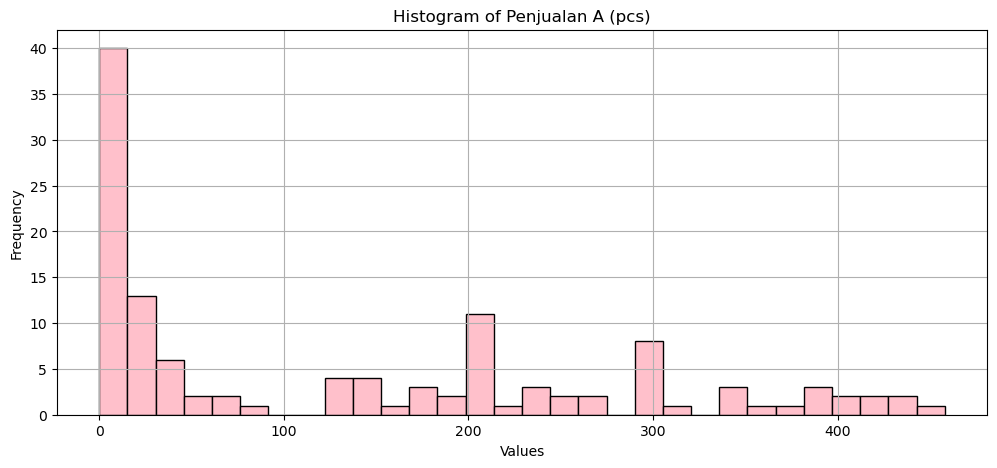

Skewness A: 0.6998366103839893
Kurtosis A: -0.8702898002535826


In [450]:
# Assuming 'column_name' is the name of the column you want to visualize
column_to_plot = df['Penjualan A (pcs)']  # Replace 'column_name' with your actual column name

# Plot the histogram
plt.figure(figsize=(12, 5))
plt.hist(column_to_plot, bins=30, color='pink', edgecolor='black')
plt.title('Histogram of Penjualan A (pcs)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the histogram to visualize the data distribution
skew_value = skew(column_to_plot)
kurtosis_value = kurtosis(column_to_plot)

print(f'Skewness A: {skew_value}')
print(f'Kurtosis A: {kurtosis_value}')


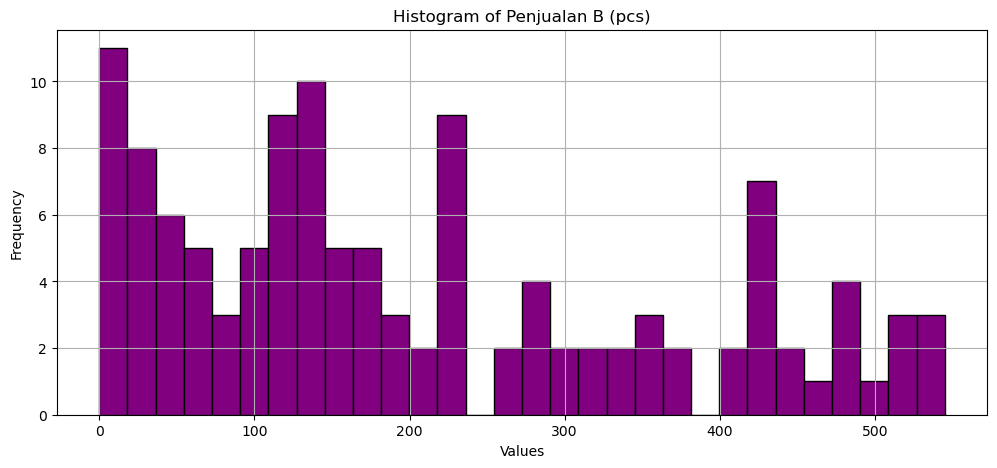

In [451]:
# Assuming 'column_name' is the name of the column you want to visualize
column_to_plot = df['Penjualan B (pcs)']  # Replace 'column_name' with your actual column name

# Plot the histogram
plt.figure(figsize=(12, 5))
plt.hist(column_to_plot, bins=30, color='purple', edgecolor='black')
plt.title('Histogram of Penjualan B (pcs)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [452]:
# Plot the histogram to visualize the data distribution
skew_value = skew(column_to_plot)
kurtosis_value = kurtosis(column_to_plot)

print(f'Skewness B: {skew_value}')
print(f'Kurtosis B: {kurtosis_value}')


Skewness B: 0.5940744231735197
Kurtosis B: -0.8313825467735128


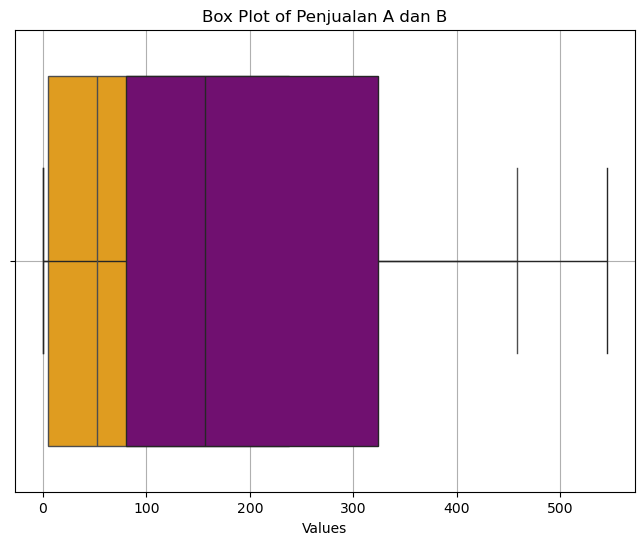

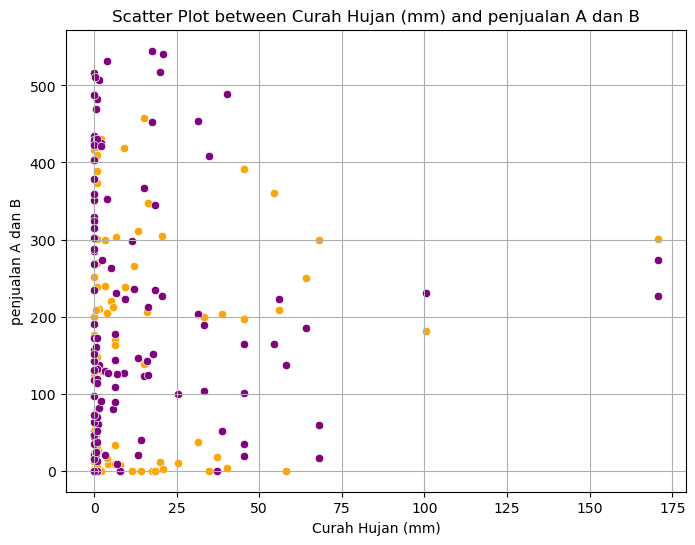

In [453]:
# # Select a column to analyze
# column_to_analyze = df['column_name']  # Replace 'column_name' with your actual column name

# # Plot the histogram
# plt.figure(figsize=(8, 6))
# plt.hist(column_to_analyze, bins=10, color='lightblue', edgecolor='black')

# # Add title and labels
# plt.title('Distribution of column_name')
# plt.xlabel('Values')
# plt.ylabel('Frequency')

# # Show the plot
# plt.grid(True)
# plt.show()

# Box plot for data distribution and outlier detection
plt.figure(figsize=(8, 6))
# sns.boxplot(x=column_to_plot, color='lightgreen')
sns.boxplot(x=df['Penjualan A (pcs)'], color='orange')  # Replace 'column_x' and 'column_y'
sns.boxplot(x=df['Penjualan B (pcs)'], color='purple')  # Replace 'column_x' and 'column_y'


# Add title and labels
plt.title('Box Plot of Penjualan A dan B')
plt.xlabel('Values')

# Show the plot
plt.grid(True)
plt.show()

# Scatter plot between two columns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Curah Hujan (mm)'], y=df['Penjualan A (pcs)'], color='orange')  # Replace 'column_x' and 'column_y'
sns.scatterplot(x=df['Curah Hujan (mm)'], y=df['Penjualan B (pcs)'], color='purple')  # Replace 'column_x' and 'column_y'

# Add title and labels
plt.title('Scatter Plot between Curah Hujan (mm) and penjualan A dan B')
plt.xlabel('column_x')
plt.ylabel('column_y')

# Show the plot
plt.grid(True)
plt.show()


**Apa itu Boxplot?** Boxplot adalah alat visualisasi yang digunakan untuk menggambarkan distribusi data dan mengidentifikasi outlier. Fungsi utamanya adalah untuk merangkum distribusi data dengan menampilkan median, kuartil, dan rentang antar kuartil (IQR). Boxplot membantu mendeteksi outlier, yaitu nilai yang jauh berbeda dari data lainnya, yang ditunjukkan sebagai titik di luar garis whiskers. Selain itu, boxplot memungkinkan kita untuk membandingkan distribusi dari beberapa set data secara bersamaan, memberikan gambaran tentang simetri atau kemiringan (skewness) data.

**Apa bedanya dengan Histogram?** Berbeda dengan histogram, yang menunjukkan frekuensi data dalam interval tertentu, boxplot tidak menggambarkan detail frekuensi. Histogram memberikan visualisasi yang lebih jelas tentang bentuk distribusi dan konsentrasi data di sepanjang rentang nilai, sedangkan boxplot lebih fokus pada ringkasan statistik dan perbandingan antar kelompok. Dengan kata lain, boxplot memberikan informasi yang lebih ringkas, sementara histogram lebih informatif mengenai distribusi frekuensi data.

**OUTLIER**: Outlier yang ditemukan pada box plot untuk curah hujan menunjukkan ada hari-hari dengan kondisi hujan ekstrem. Outlier dalam penjualan menunjukkan ada hari-hari dengan penjualan yang sangat rendah atau tinggi, yang mungkin disebabkan oleh faktor eksternal seperti promosi, cuaca, atau musim liburan. Scatter plot bisa memberi indikasi apakah ada hubungan antara curah hujan dan penjualan A atau B. Misalnya, jika curah hujan tinggi berdampak negatif terhadap penjualan A tetapi tidak terlalu memengaruhi penjualan B, maka penjualan A mungkin lebih sensitif terhadap cuaca buruk.

**KESIMPULAN:** Data penjualan produk A menunjukkan distribusi yang miring ke kanan, yang dapat dilihat dari bentuk histogramnya yang memiliki ekor panjang di sisi kanan. Hal yang sama juga terjadi pada data penjualan produk B, yang menunjukkan distribusi miring ke kanan dengan karakteristik serupa, yaitu ekor panjang di sebelah kanan histogram. Distribusi ini dapat dianalisis lebih lanjut menggunakan nilai skewness. Berdasarkan perhitungan skewness di atas, sebuah variabel X dikatakan memiliki distribusi miring ke kanan jika nilai skewness-nya > 0. Dari hasil analisis, baik penjualan produk A maupun produk B memiliki nilai skewness positif, yang mengindikasikan bahwa kedua data penjualan tersebut memang condong ke kanan, atau memiliki ekor distribusi yang lebih panjang di sisi kanan.